Collaborative coding using GitHub
===========

Alexandre Perera Luna, Mónica Rojas Martínez

December 15th 2023


## Collaborators
* Collaborator 1: Pol Torné Charlez 
* Collaborator 2: Damari Alicia Paredes García
* Collaborator 3: Macabe John Daley

# Goal

The objective of this assignment is to construct a project through collaborative coding, showcasing an Exploratory Data Analysis (EDA) and a classification. To facilitate your understanding of GitHub, we will utilize code snippets from previous exercises, allowing you to focus on the process without concerns about the final outcome. The current notebook will serve as the main function in the project, and each participant is required to develop additional components and integrate their contributions into the main branch.


## Requirements

In order to work with functions created in other jupyter notebooks you need to install the package `nbimporter` using a shell and the following command:

<font color='grey'>pip install nbimporter</font>

`nbimporter` allows you to import jupyter notebooks as modules. Once intalled and imported, you can use a command like the following to import a function called *fibonacci* that is stored on a notebook *fibbo_func* in the same path as the present notebook:

<font color='green'>from</font> fibbo_func <font color='green'>import</font> fibbonaci  <font color='green'>as</font> fibbo



In [1]:
%pip install nbimporter
%pip install nbformat
# %pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
## Modify this cell by importing all the necessary modules you need to solve the assigmnent. Observe that we are importing
## the library nbimporter. You will need it for calling fuctions created in other notebooks.
import nbimporter
import pandas as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import matplotlib              as mpl
import seaborn                 as sns
from itertools import *
from collections import Counter, OrderedDict
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# This statement allow to display plots without asking to
%matplotlib inline

# you can also add the following line for making pretty-loking plots
plt.style.use('ggplot')


In [3]:
# Here is an example of invoking the Fibonacci function, whisch should be located in the same directory as the main:
from fibbo_func import fibbonaci as fibbo
fibbo(24)

46368

We import the functions from the notebooks of all the collaborators.

In [4]:
# Functions of collaborator 1
from Collaborator_1 import renamevars
from Collaborator_1 import calculate_correlation
from Collaborator_1 import plot_scatter
from Collaborator_1 import visualize_high_correlation

# Functions of collaborator 2
from Collaborator_2 import scat_plt as scat_plt
from Collaborator_2 import normalize as normalize

# Functions of collaborator 3
from Collaborator_3 import group_and_average
from Collaborator_3 import variable_correlation_plot
from Collaborator_3 import perform_knn_classification

## Exercises
As an illustration of Git workflow, you will analyze the *Parkinson's* dataset, which has been previously examined in past assignments. Each team member has specific responsibilities that may be crucial for the progress of others. Make sure all of you organize your tasks accordingly. We've structured the analysis into modules to assist you in tracking your tasks, but feel free to deviate from it if you prefer.   
Please use Markdown cells for describing your workflow and expalining the findings of your work.
Remember you need both, to modify this notebook and, to create additional functions outside. Your work will only be available for others when you modify and merge your changes.


In [5]:
# We will start by loading the parkinson dataset. The rest is up to you!
df = pd.read_csv('parkinsons.data',
                 dtype = { # indicate categorical variables
                     'status': 'category'})
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### 1. Cleaning and tidying the dataset

First of all, we rename the variables of the given dataframe using the function *renamevars(df,dict_names)* to use simple names for the rest of the analysis.

In [6]:
dict_names = {'MDVP:Fhi(Hz)':'maxFF', 
              'MDVP:Flo(Hz)':'minFF',
              'MDVP:Jitter(%)': 'percJitter',
              'MDVP:Jitter(Abs)':'absJitter' ,
              'MDVP:RAP': 'rap',
              'MDVP:PPQ': 'ppq',
              'Jitter:DDP': 'ddp',
              'MDVP:Shimmer' : 'lShimer',
              'MDVP:Shimmer(dB)': 'dbShimer',
              'Shimmer:APQ3':'apq3',
              'Shimmer:APQ5': 'apq5',
              'MDVP:APQ':'apq',
              'MDVP:Fo(Hz)':'avFF',
              'Shimmer:DDA':'dda'}

In [7]:
# your code here
df = renamevars(df, dict_names)
df.head(10)

,name,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,lShimer,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


Also, we create two new columns using the variable _name_, one for subject id and the other for the number of trial.

In [8]:
split_name = df.name.str.split('_',expand=True) # separate the string into segments using the character '_' as separator
# It would create one column for each segment

print('spliting the values in "name" yields the following data frame. The first two columns are useless')
print(split_name.head()) # note that the first two columns are not relevant for our analisys so we can drop them
split_name.drop(split_name.columns[[0, 1]], axis =1, inplace = True) # drop the first two columns and modify the dataframe
split_name.columns = ['subject_id', 'trial'] # addnames to the respective columns for facilitating interpretation
split_name

spliting the values in "name" yields the following data frame. The first two columns are useless
      0    1    2  3
0  phon  R01  S01  1
1  phon  R01  S01  2
2  phon  R01  S01  3
3  phon  R01  S01  4
4  phon  R01  S01  5


,subject_id,trial
0,S01,1
1,S01,2
2,S01,3
3,S01,4
4,S01,5
...,...,...
190,S50,2
191,S50,3
192,S50,4
193,S50,5


We add the new two columns to the dataframe and also remove the orginal _name_. In addition we place the two new columns in the first positions in the dataframe.

In [9]:
# add new columns
df = df.assign(Subject_id=split_name['subject_id'],
               Trial=split_name['trial'])
# change position of columns
column_to_move = df.pop("Subject_id")
# insert column with insert(location, column_name, column_value)
df.insert(0, "Subject_id", column_to_move)
column_to_move = df.pop("Trial")
# insert column with insert(location, column_name, column_value)
df.insert(1, "Trial", column_to_move)
df = df.drop(columns=["name"])
df.head(5)

,Subject_id,Trial,avFF,maxFF,minFF,percJitter,absJitter,rap,ppq,ddp,...,dda,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01,2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01,3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01,4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01,5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


The main objective is to obtain a cleaner dataframe, to do that we will try to identify the correlated variables. We will apply the _scat_plt()_ function to observe their behavior.

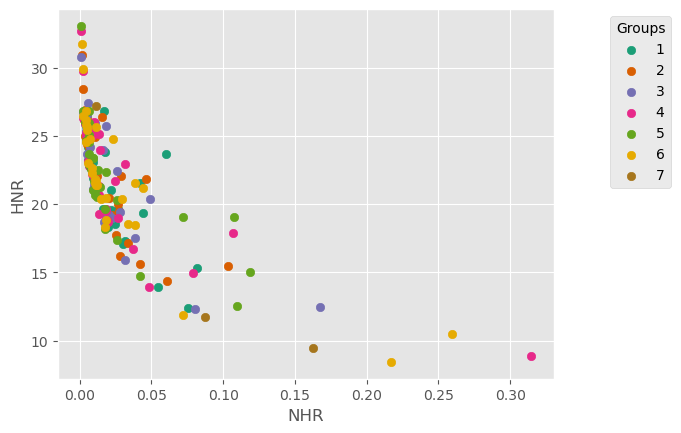

In [10]:
# example of scat_plt() in action
scat_plt(df['NHR'], df['HNR'], df['Trial']) # exemple to see if works, remove for final deliver

In the Collaborator_3 notebook we also wrapped up this function with another to give correlation matrices.

In [11]:
# Identify the variables for each group that we want to explore correlation in
vars_ff = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
vars_jitter = ['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
vars_shimmer = ['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA']

vars_ff = [dict_names[var] for var in vars_ff]
vars_jitter = [dict_names[var] for var in vars_jitter]
vars_shimmer = [dict_names[var] for var in vars_shimmer]
print(vars_ff, vars_jitter, vars_shimmer)

['avFF', 'maxFF', 'minFF'] ['absJitter', 'rap', 'ppq', 'ddp'] ['lShimer', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda']


In [12]:
def variable_correlation_plot(variable_list, df, group='status'):
    """
    This method plots the correlations of all unique variable combinations _within_ the variable list provided
    It also makes use of the scat_plt function.
    """
    combinations = [(x, y) for i, x in enumerate(variable_list) for y in variable_list[i+1:] if x != y]
    for combination in combinations:
        correlation = np.corrcoef(df[str(combination[0])], df[str(combination[1])])[0, 1]
        print(f'Scatter Plot of {str(combination[0])} vs {str(combination[1])} by {group}\nCorrelation: r={correlation:.2f}')
        scat_plt(df[str(combination[0])], df[str(combination[1])], df[group])
        
    # now let's create an overall correlation matrix to consider all variables at once
    correlation_matrix = df[variable_list].corr()
    sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, )
    plt.title('Clustered correlation heatmap with hierarchical clustering')
    #plt.figure(figsize=(4, 4))
    plt.show()

Scatter Plot of avFF vs maxFF by status
Correlation: r=0.40


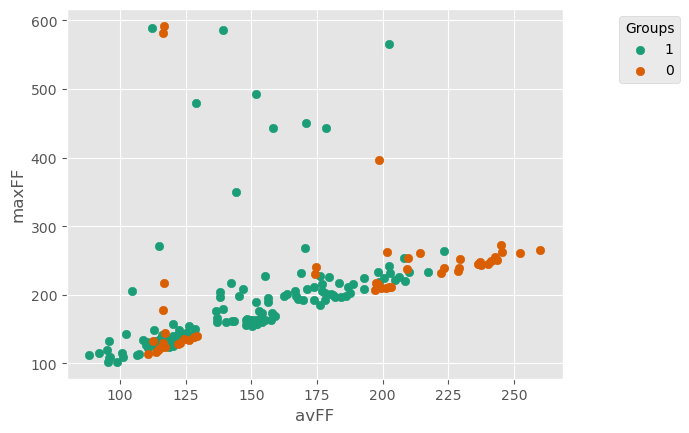

Scatter Plot of avFF vs minFF by status
Correlation: r=0.60


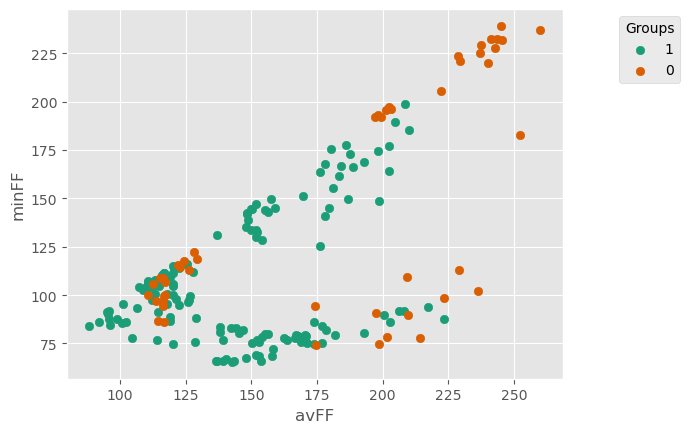

Scatter Plot of maxFF vs minFF by status
Correlation: r=0.08


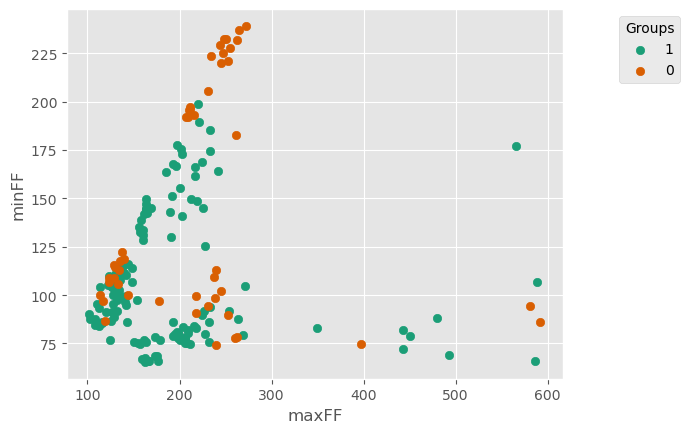

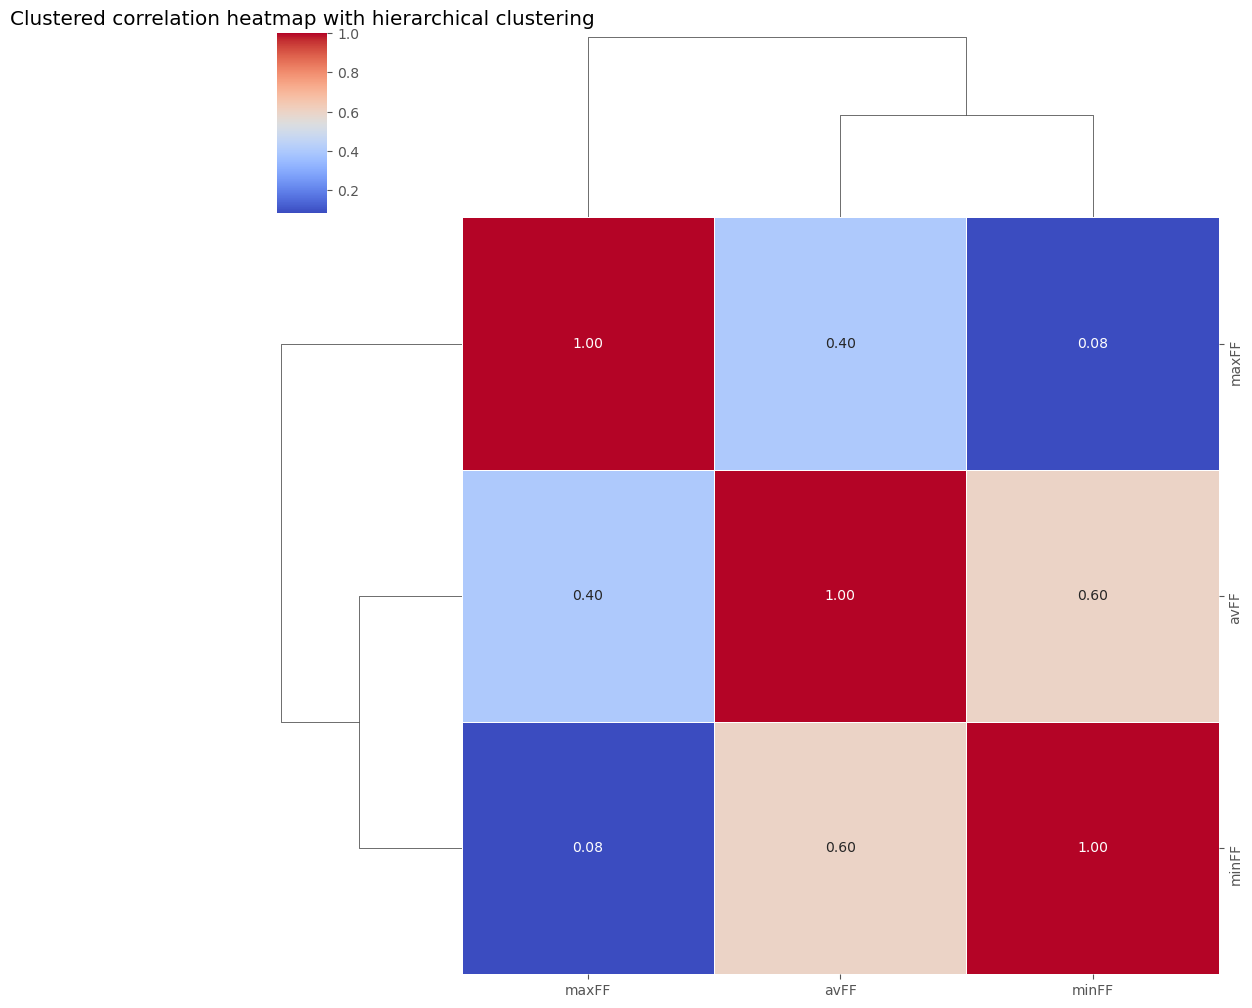

In [13]:
variable_correlation_plot(variable_list=vars_ff, df=df, group='status')

Scatter Plot of absJitter vs rap by status
Correlation: r=0.92


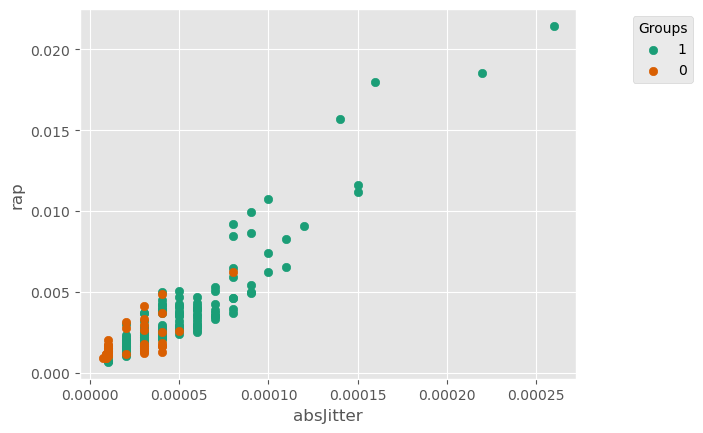

Scatter Plot of absJitter vs ppq by status
Correlation: r=0.90


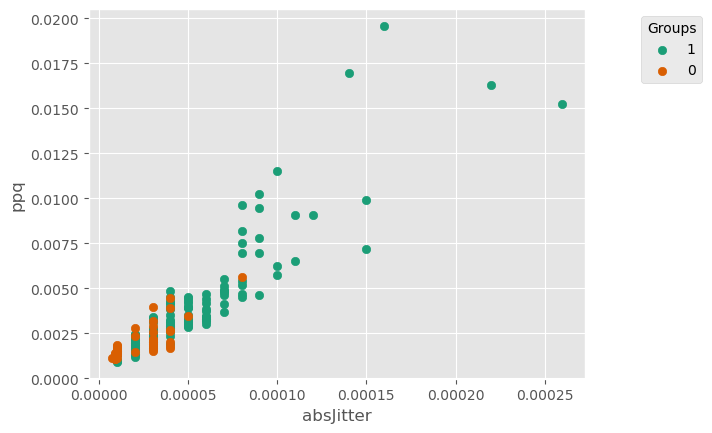

Scatter Plot of absJitter vs ddp by status
Correlation: r=0.92


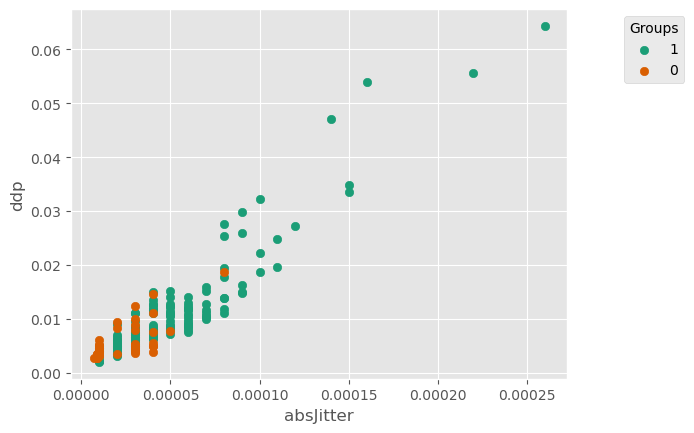

Scatter Plot of rap vs ppq by status
Correlation: r=0.96


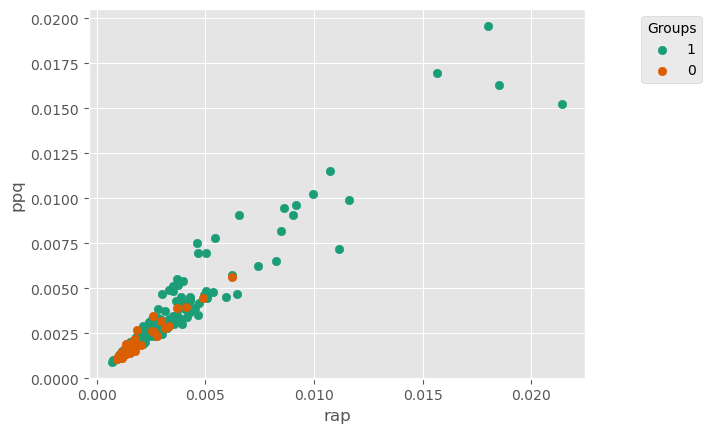

Scatter Plot of rap vs ddp by status
Correlation: r=1.00


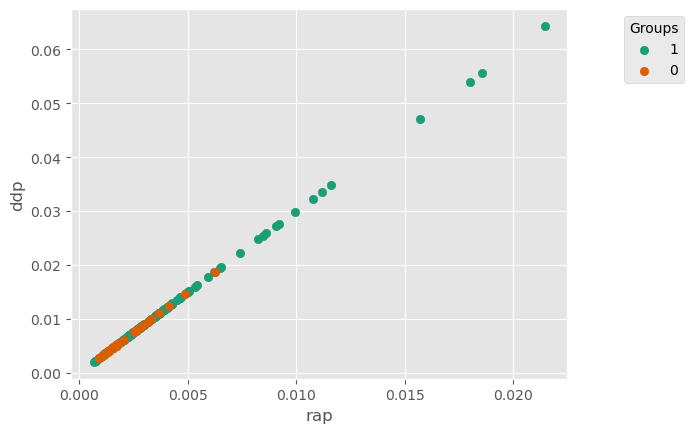

Scatter Plot of ppq vs ddp by status
Correlation: r=0.96


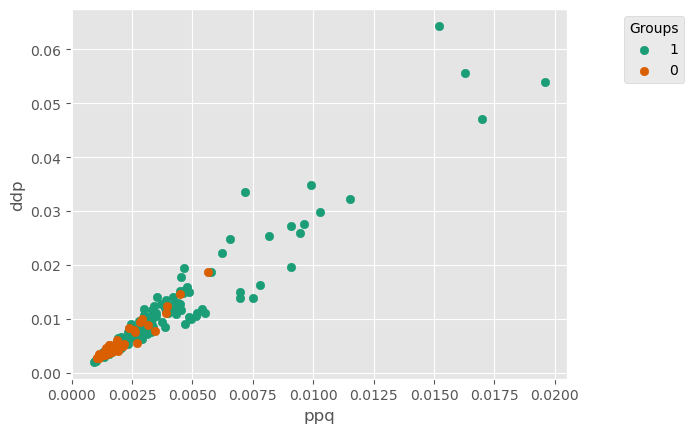

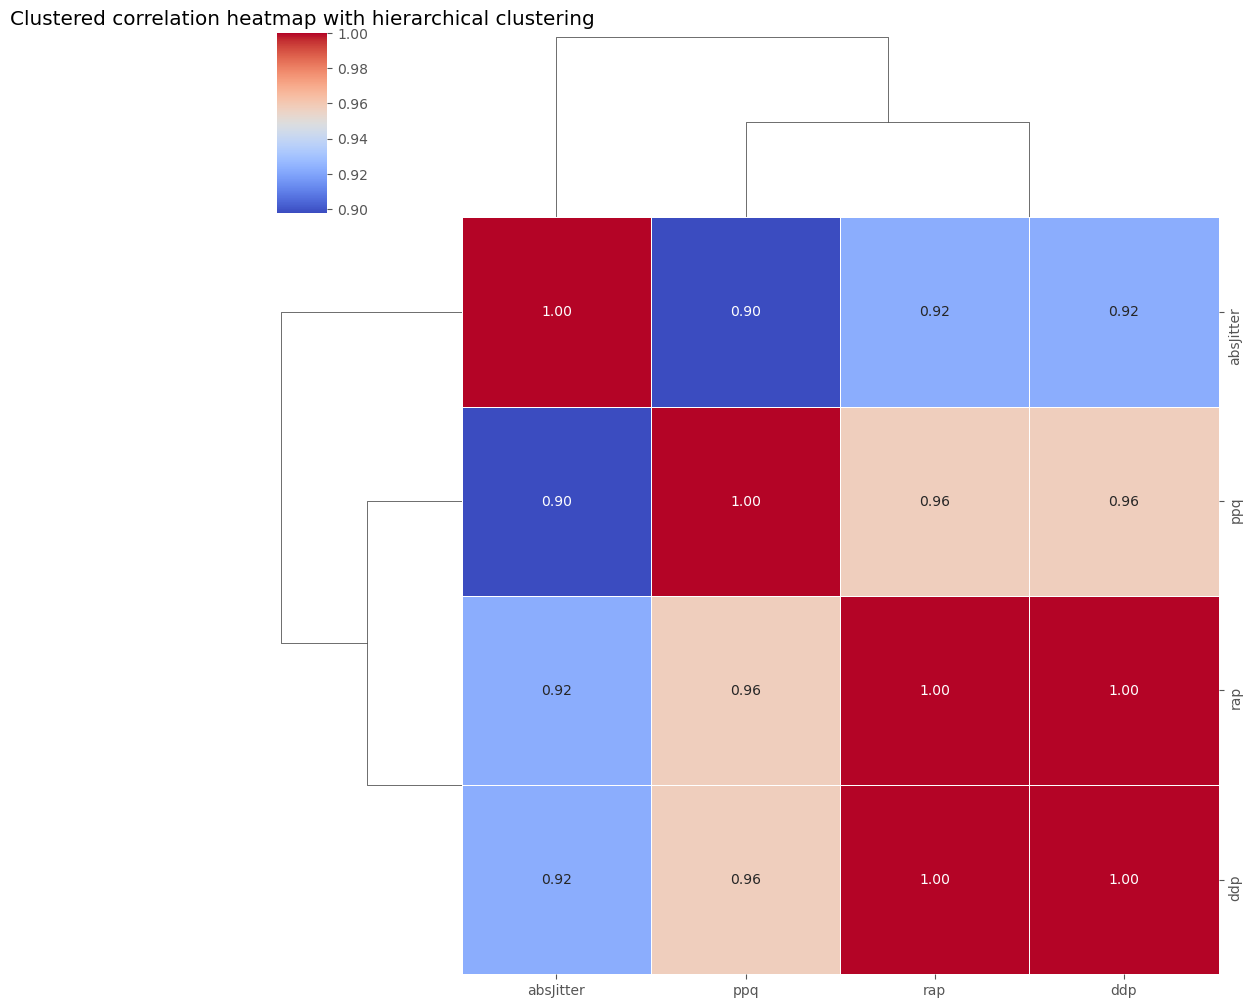

In [14]:
variable_correlation_plot(variable_list=vars_jitter, df=df, group='status')

Scatter Plot of lShimer vs dbShimer by status
Correlation: r=0.99


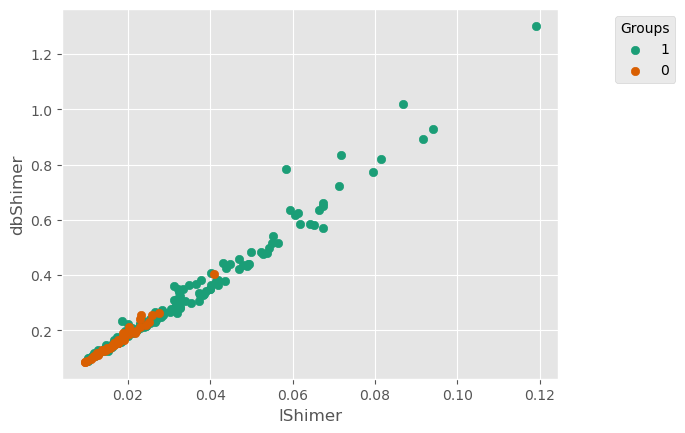

Scatter Plot of lShimer vs apq3 by status
Correlation: r=0.99


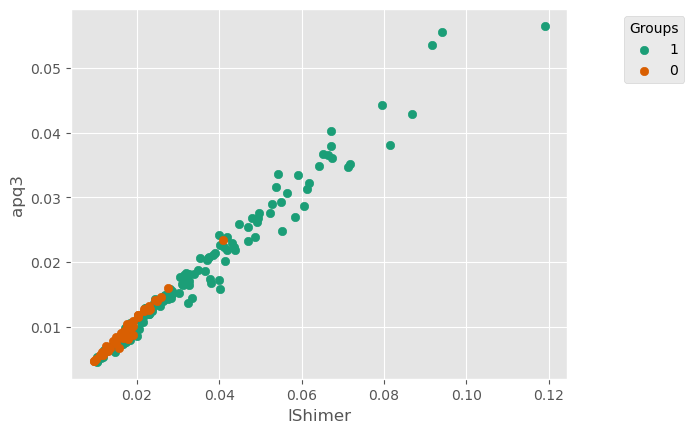

Scatter Plot of lShimer vs apq5 by status
Correlation: r=0.98


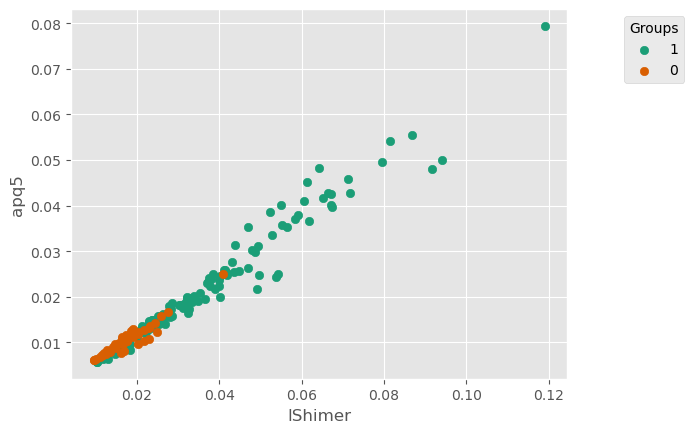

Scatter Plot of lShimer vs apq by status
Correlation: r=0.95


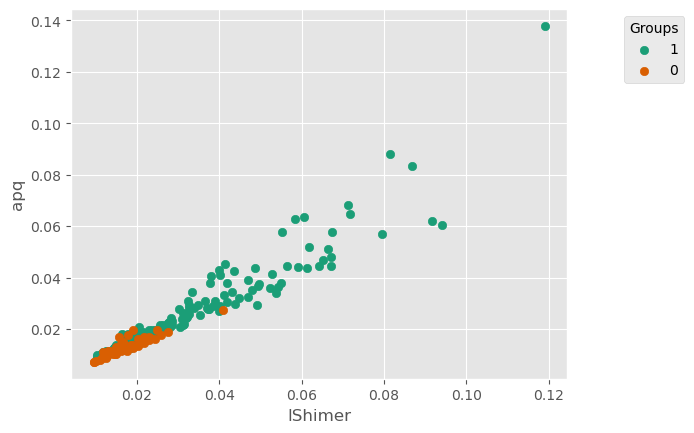

Scatter Plot of lShimer vs dda by status
Correlation: r=0.99


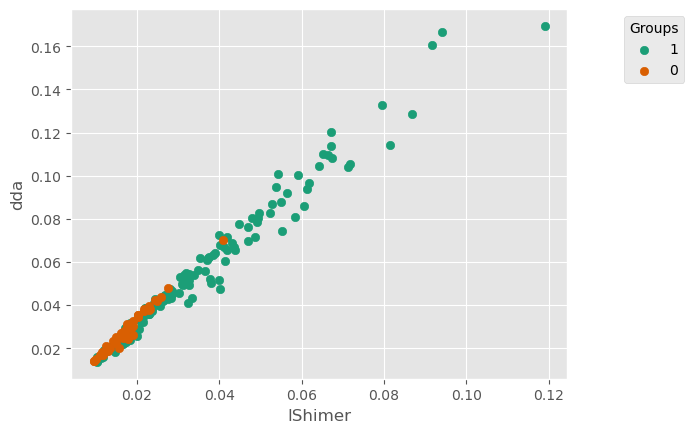

Scatter Plot of dbShimer vs apq3 by status
Correlation: r=0.96


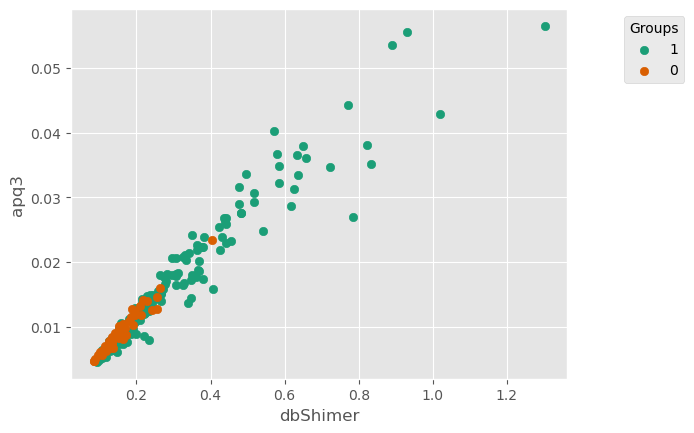

Scatter Plot of dbShimer vs apq5 by status
Correlation: r=0.97


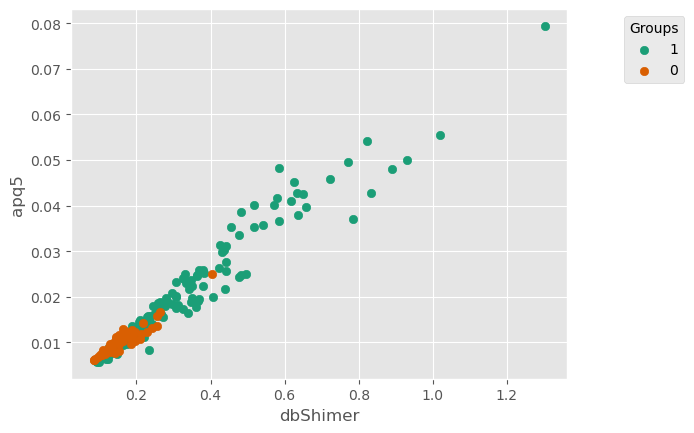

Scatter Plot of dbShimer vs apq by status
Correlation: r=0.96


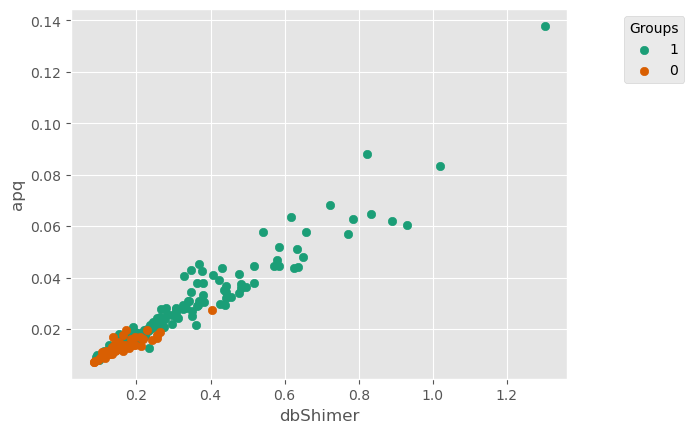

Scatter Plot of dbShimer vs dda by status
Correlation: r=0.96


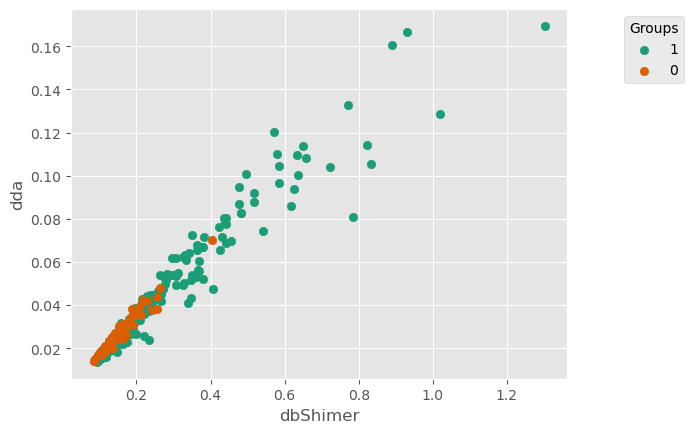

Scatter Plot of apq3 vs apq5 by status
Correlation: r=0.96


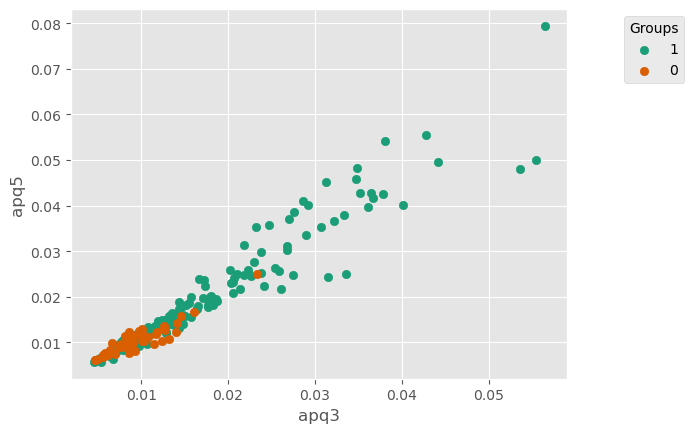

Scatter Plot of apq3 vs apq by status
Correlation: r=0.90


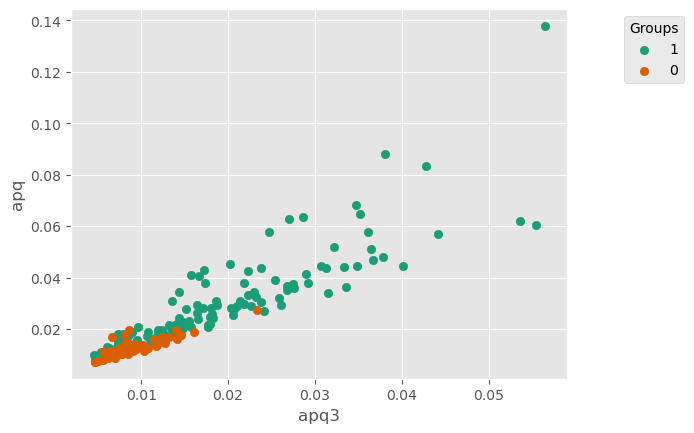

Scatter Plot of apq3 vs dda by status
Correlation: r=1.00


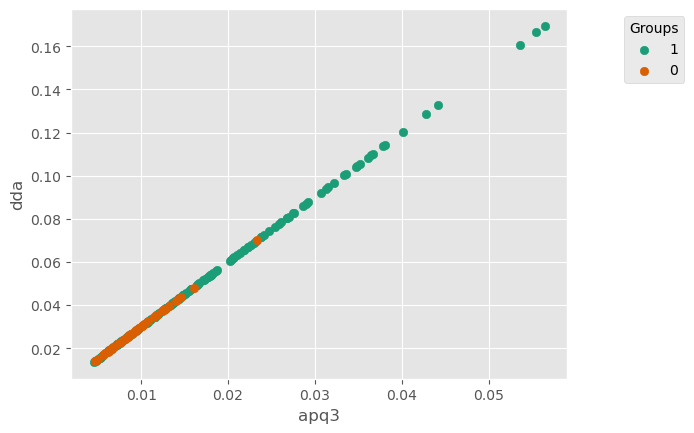

Scatter Plot of apq5 vs apq by status
Correlation: r=0.95


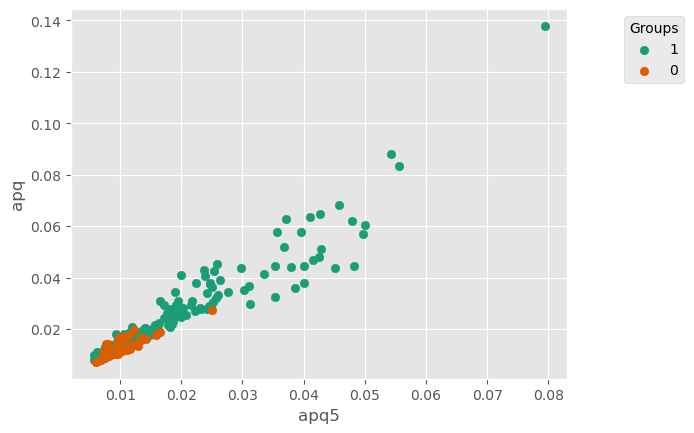

Scatter Plot of apq5 vs dda by status
Correlation: r=0.96


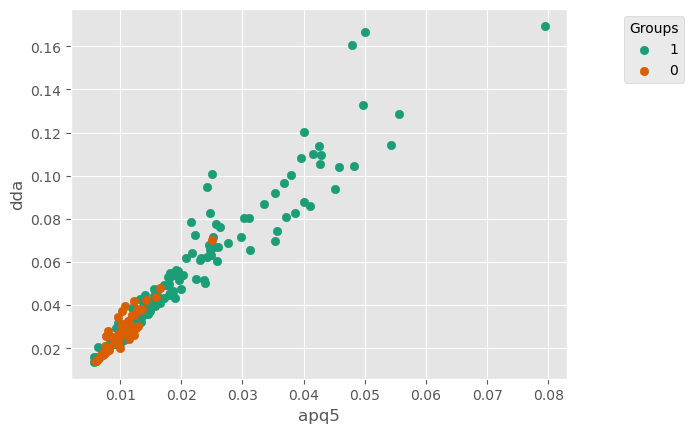

Scatter Plot of apq vs dda by status
Correlation: r=0.90


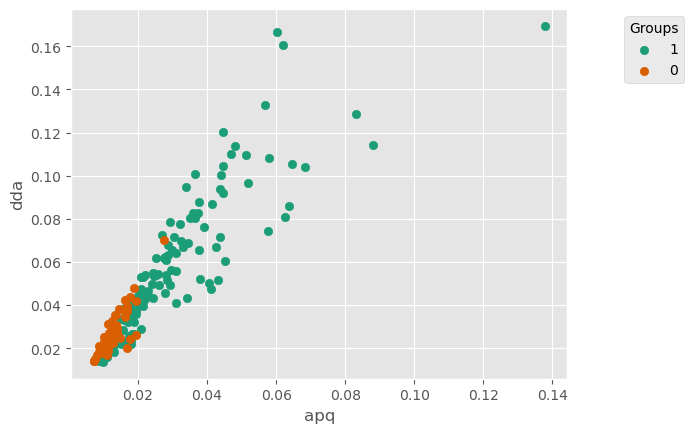

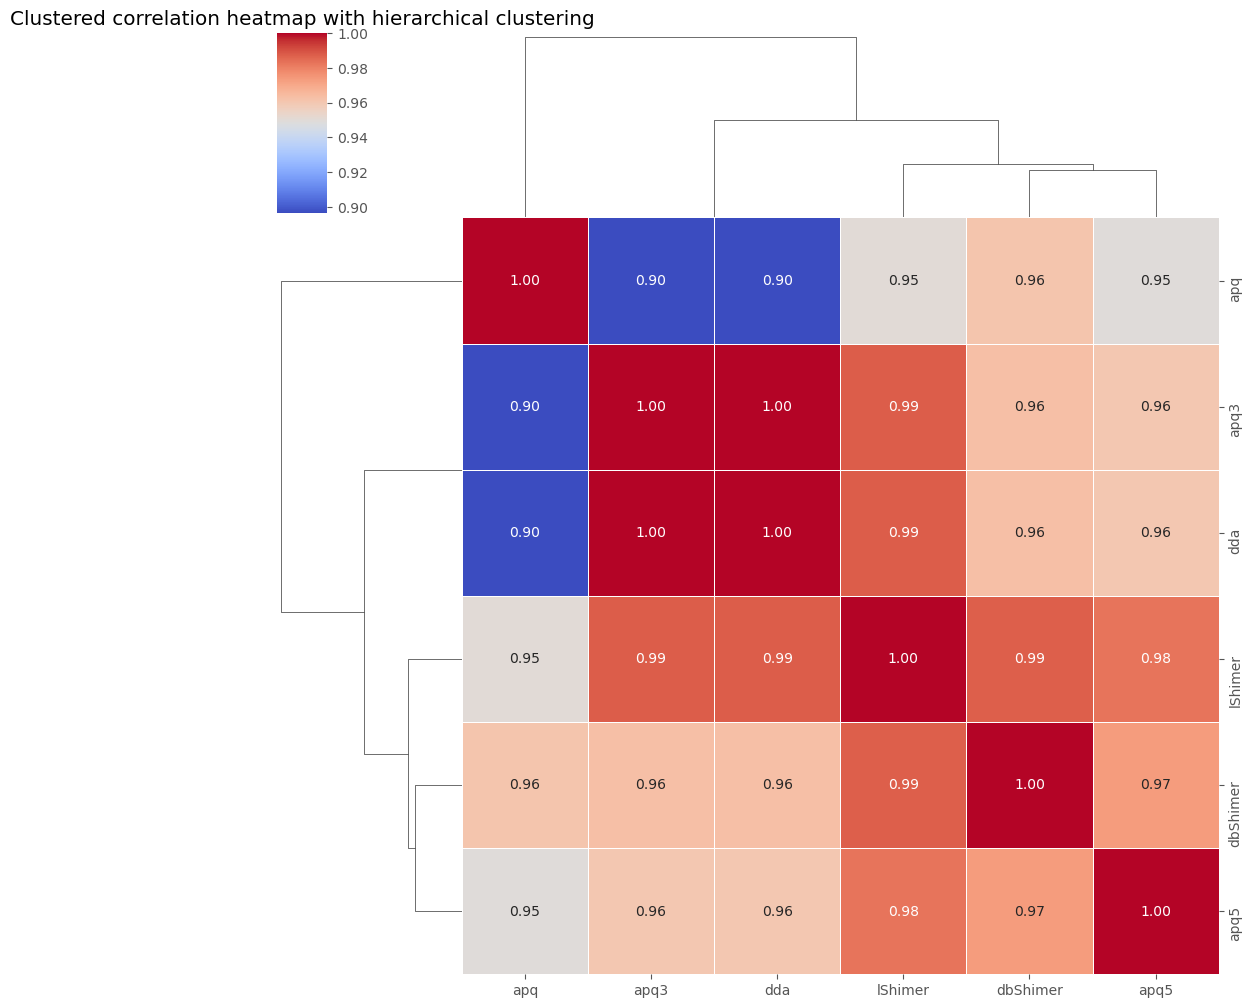

In [15]:
variable_correlation_plot(variable_list=vars_shimmer, df=df, group='status')

### Intepretation of Correlation Plots & Feature selection

We inspected the pair-wise and variable wise correlation plots across those related to fundamental frequency, jitter, and shimmer. This showed the need to perform feature selection in some variable groups:

- For the variables relating to fundamental frequency, the pairwise correlations plots showed strong correlation between variables across some sample subsets, but this was not the case for all samples. For example while minFF and avFF had a moderately strong correlation of r=0.60, there were still many samples that did not fit this pattern. As a result, we decided we would keep each of these variables as they are for the analysis, at least for now.

- For the variables relating to jitter, the pairwise correlation plots and the correlation matrix confirmed that there was very strong correlation across all of the variables (r=>0.9). We therefore decided we would only keep 1 of these variables. Observing the correlation matrix we noted that while rap, ppq and ddp were all more correlated to eachother than to absjitter. In particular, absjitter and ppq had slightly lower pairwise correlation (r=0.9) than combinations of rap or ddp with absjitter. For this reason, rap was selected as the variable moving forward that was quite representative of all other jitter variables.

- Like jitter, all shimmer variables were highly correlated to eachother (r=>0.9). We decided therefore to only keep lShimer, as according to the clustered correlation heatmap and the hierarchical clustering, it appeared to be the variable that was the most representative on average of the overall shimmer variables.

In [16]:
# from the 3 variable lists discussed we want to keep all those from
# fundamental frequency, only rap for jitter, and only lShimer for shimmer
vars_to_be_dropped = [item for item in vars_jitter+vars_shimmer if not item in ['rap','lShimer']]
print(vars_to_be_dropped)

['absJitter', 'ppq', 'ddp', 'dbShimer', 'apq3', 'apq5', 'apq', 'dda']


In [17]:
cleaned_df = df.drop(columns=vars_to_be_dropped)
cleaned_df

,Subject_id,Trial,avFF,maxFF,minFF,percJitter,rap,lShimer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,1,119.992,157.302,74.997,0.00784,0.00370,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01,2,122.400,148.650,113.819,0.00968,0.00465,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01,3,116.682,131.111,111.555,0.01050,0.00544,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01,4,116.676,137.871,111.366,0.00997,0.00502,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01,5,116.014,141.781,110.655,0.01284,0.00655,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,S50,2,174.188,230.978,94.261,0.00459,0.00263,0.04087,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,S50,3,209.516,253.017,89.488,0.00564,0.00331,0.02751,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,S50,4,174.688,240.005,74.287,0.01360,0.00624,0.02308,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,S50,5,198.764,396.961,74.904,0.00740,0.00370,0.02296,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Let's have a quick sneak peak now at the overall correlations of the cleaned_df

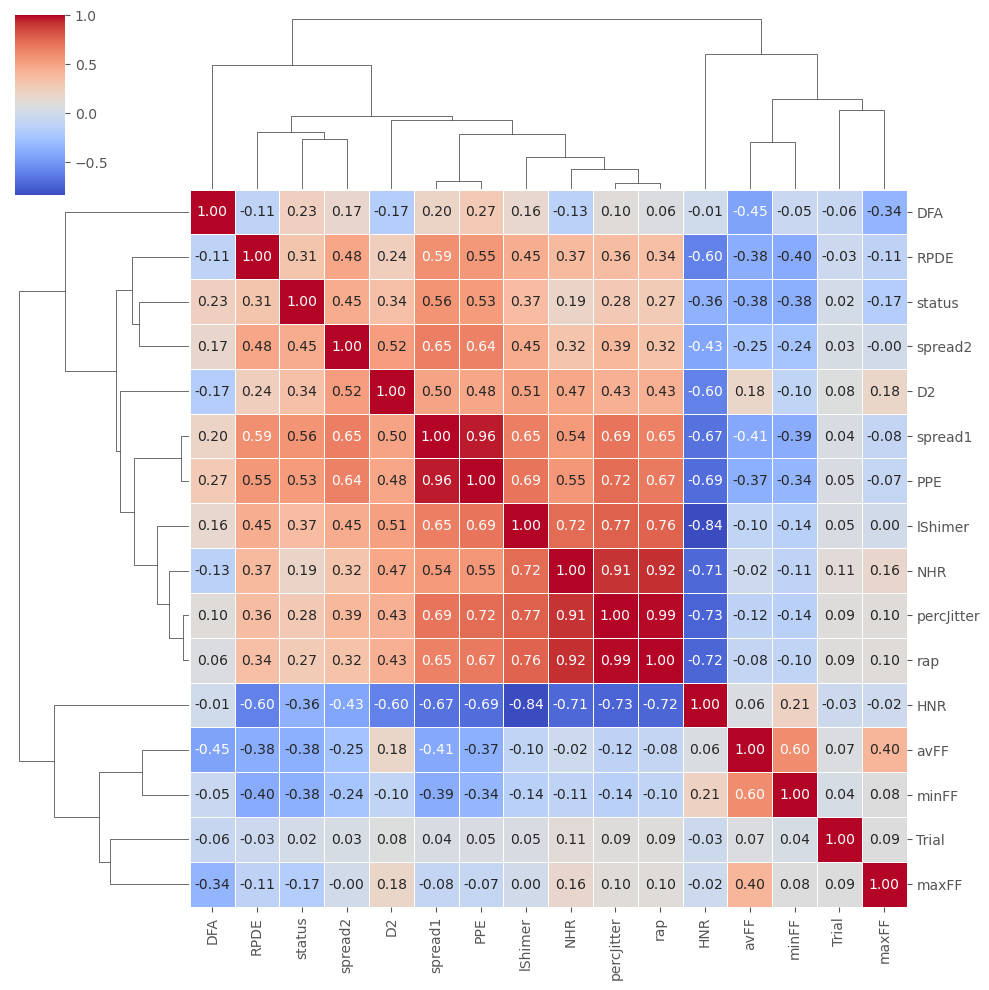

In [18]:
sns.clustermap(cleaned_df.drop(columns='Subject_id').corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

The above clustered heatmap reveals that a small number of variables are highly correlated despite being very similar. For example, there is a r=0.99 correlation between percjitter and rap. This indicates that perhaps percjitter should have been included in the filtering, despite not being explicityly included in the instructions. Nevertheless, we will proceed with the modelling and can perhaps drop one of these later if necessary.

### 2. Basic EDA based on plots and descriptive statistics

In this section we will make some EDA (Exploratory Data Analysis) of the cleaner dataframe. We will plot variables and make descriptive statistics.

1. Number of observations

In [19]:
print('Number of observations: ',cleaned_df.shape[0])

Number of observations:  195


2. Are there differences between controls and patients?

In [20]:
healthy = cleaned_df[cleaned_df['status']=='0']
parkinsons_disease = cleaned_df[cleaned_df['status']=='1']
print('Number of healthy: ',healthy.shape[0])
print('Number of patients: ',parkinsons_disease.shape[0])

Number of healthy:  48
Number of patients:  147


Below, boxplots for each variable against the status of the subjects are provided. Differences can be found in each scenario, although not in a bold way. 

In [21]:
cleaned_df

,Subject_id,Trial,avFF,maxFF,minFF,percJitter,rap,lShimer,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,S01,1,119.992,157.302,74.997,0.00784,0.00370,0.04374,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,S01,2,122.400,148.650,113.819,0.00968,0.00465,0.06134,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,S01,3,116.682,131.111,111.555,0.01050,0.00544,0.05233,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,S01,4,116.676,137.871,111.366,0.00997,0.00502,0.05492,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,S01,5,116.014,141.781,110.655,0.01284,0.00655,0.06425,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,S50,2,174.188,230.978,94.261,0.00459,0.00263,0.04087,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,S50,3,209.516,253.017,89.488,0.00564,0.00331,0.02751,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,S50,4,174.688,240.005,74.287,0.01360,0.00624,0.02308,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,S50,5,198.764,396.961,74.904,0.00740,0.00370,0.02296,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


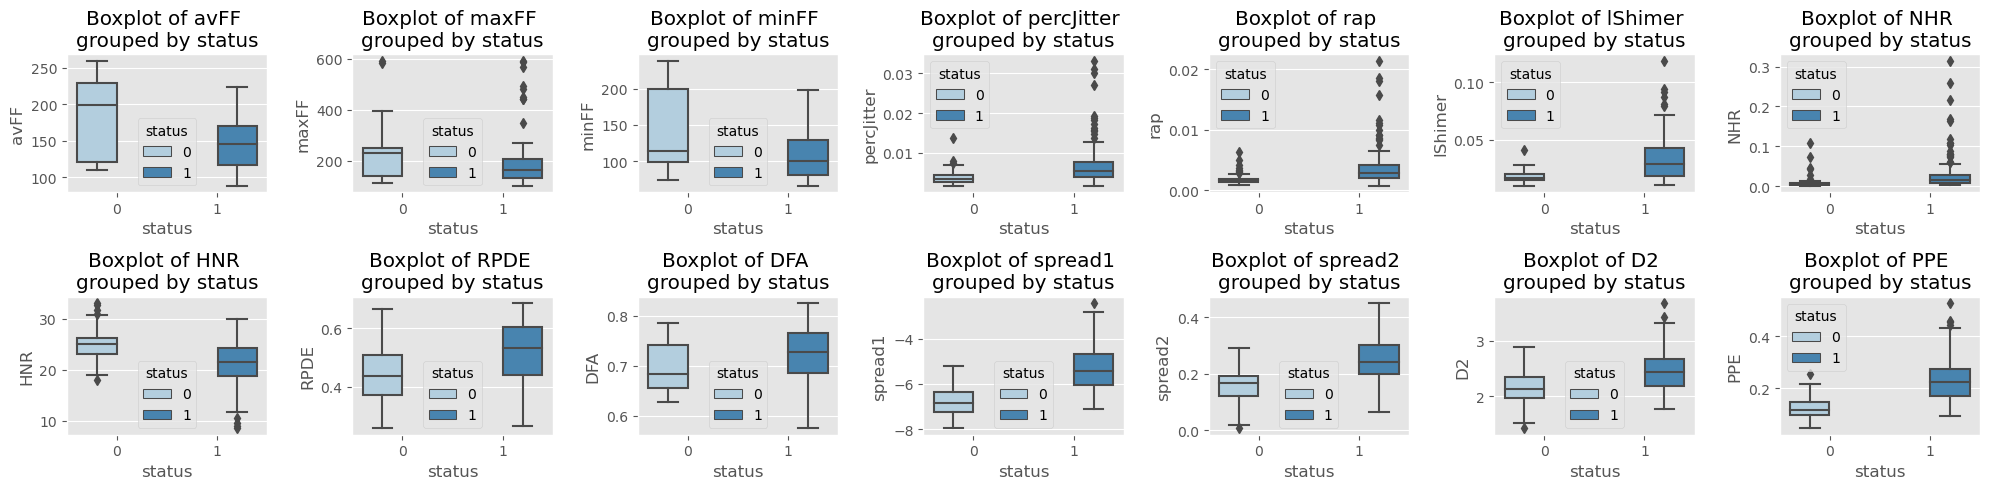

In [22]:
dfff = cleaned_df.drop(columns = ['Subject_id', 'Trial']) # Removing the name column
status_column = dfff.pop('status')  # Rearrange the status column
dfff.insert(0, 'status', status_column)

num_columns = int((dfff.shape[1]-1) / 2)  # Minus 1 to not count the 'status' column
# Create the image subplots
fig, axes = plt.subplots(nrows=2, ncols=num_columns, figsize=(20, 5))

# Loop through each column (excluding 'status') and create a boxplot on each subplot
for i, column in enumerate(dfff.columns[1:]):
    sns.boxplot(x='status', y=column, data=dfff, ax=axes[i // num_columns, i % num_columns], palette='Blues',  hue='status')
    axes[i // num_columns, i % num_columns].set_title(f'Boxplot of {column} \ngrouped by status')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

To study more in depth the possible differences between healthy and unhealthy groups, let's do a Principal Components Analysis. First, data is going to be standardized, and then PCA will be executed to obtain a new dimensional space from which to check the variance explained by the space-confirming (principal) components.

In [23]:
dfff.head()

,status,avFF,maxFF,minFF,percJitter,rap,lShimer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,1,119.992,157.302,74.997,0.00784,0.00370,0.04374,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,1,122.400,148.650,113.819,0.00968,0.00465,0.06134,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,1,116.682,131.111,111.555,0.01050,0.00544,0.05233,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,1,116.676,137.871,111.366,0.00997,0.00502,0.05492,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,1,116.014,141.781,110.655,0.01284,0.00655,0.06425,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


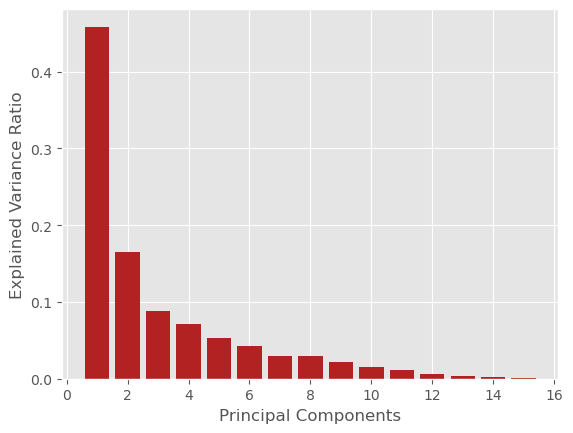

In [24]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfff)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color='firebrick')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

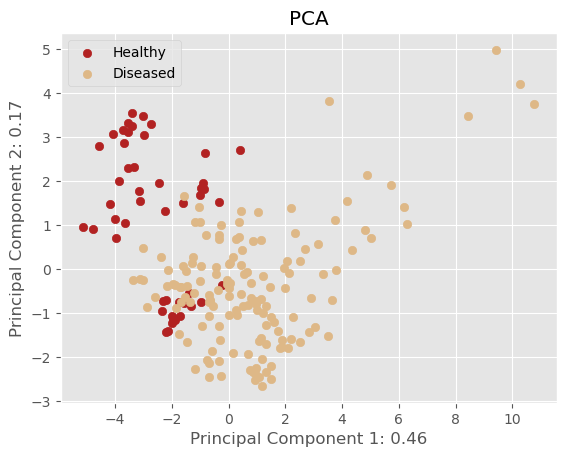

In [25]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=pca_result[:,:2], columns=['PC1', 'PC2'])
pc_df.insert(0, 'status', status_column)
pc_df['status'] = pc_df['status'].astype('category')

healthy = pc_df[pc_df['status'] == '0']
parkinson_disease = pc_df[pc_df['status'] == '1']

plt.scatter(healthy['PC1'], healthy['PC2'], label='Healthy', c='firebrick')
plt.scatter(parkinson_disease['PC1'], parkinson_disease['PC2'], label='Diseased', c='burlywood')

plt.xlabel(f'Principal Component 1: {round(explained_variance_ratio[0],2)}')
plt.ylabel(f'Principal Component 2: {round(explained_variance_ratio[1],2)}')
plt.title('PCA')
plt.legend()
plt.show()

*With all the information above, we can conclude that...*

- Total observations: 195
    - Healthy: 48
    - Diseased: 147
- Differences among groups...
    - There are some apparent differences among groups means, ranges, and standard deviations, as noticed through the boxplots.
    - The number of outliers is relatively low, apart from the NHR case, as can be also appreciated in the boxplots. Since these don't seem to have a meaningful impact on the differentiation of the groups, no actions will be required against them.
    - Thanks to the PCA, we see that a discretization between the two groups is possible, there exists an overall intrinsic difference among them, most noticebly with the first principal component or x axis. On the other hand, the second principal componet doesn't provide very evident differences among the two groups, although it could be argued that a slight separation is found, with the healthy group on the top and the diseased one in the bottom of the axis.

----------------------------------------------------------------

### 3. Aggregating and transforming variables in the dataset

In [26]:
# create the average
averaged_df = group_and_average(df=cleaned_df.drop(columns=['Trial']), gv='Subject_id')

A TypeError occurred during grouping, probably due to the categorical variable. Converting to cat code.


In [27]:
# z-score normalisation
averaged_df_zscore =normalize(averaged_df, op=0)
averaged_df_zscore

,avFF,maxFF,minFF,percJitter,rap,lShimer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.858111,-0.865709,-0.272224,0.921345,0.663099,1.472263,-0.227810,-0.371066,-0.726657,1.922766,1.504659,1.033968,-0.092451,1.844742,1.0
1,-1.320857,-1.175094,-0.554373,-0.368316,-0.362863,-0.464987,-0.439780,0.247752,1.047959,1.116260,0.287285,1.198246,-0.266879,0.356438,1.0
2,-0.159027,0.338062,-0.763815,-0.424201,-0.579697,-0.604591,-0.320550,0.463287,0.246296,-1.345769,0.373016,0.351982,-0.035598,0.331445,1.0
3,0.146023,-0.223355,-0.784150,0.021318,-0.080148,0.836087,0.038238,-0.693056,1.343418,-0.413620,1.173608,0.770720,1.314098,1.308363,1.0
4,-0.078475,0.200993,-1.009749,-0.217074,-0.209352,-0.483100,-0.268667,0.669268,-0.682425,0.029514,-0.540932,0.050889,0.216257,-0.501605,1.0
5,1.133328,0.242736,2.075406,-0.936158,-0.804206,-1.117375,-0.652323,2.157434,-1.070315,0.435725,-1.949614,-0.741538,-1.820326,-1.704270,0.0
6,0.688034,0.006545,1.448265,-0.686823,-0.578417,-0.761108,-0.603972,0.904868,-1.485033,0.941533,-0.706797,-0.455133,0.089362,-0.712107,1.0
7,2.196784,0.934143,2.812861,-0.883008,-0.761990,-0.846872,-0.539870,0.634075,-0.484261,-1.487184,-1.450517,-1.361100,-0.232014,-1.328203,0.0
8,-0.691391,-0.977231,0.016631,-0.365971,-0.700586,-0.534539,-0.541493,0.663177,0.122921,0.830158,-1.027186,0.525011,-0.857728,-1.020265,0.0
9,-0.997439,-0.660364,-0.282248,0.442607,0.091273,0.015873,-0.418540,-0.058273,0.463794,1.838760,1.216565,0.218640,-1.383028,1.494024,1.0


In [28]:
# min/max normalisation
averaged_df_minmax =normalize(averaged_df, op=1)
averaged_df_minmax

,avFF,maxFF,minFF,percJitter,rap,lShimer,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.142457,0.117286,0.255297,0.425876,0.345393,0.637715,0.085869,0.440822,0.324800,1.000000,0.851867,0.794608,0.406677,0.873702,1.0
1,0.012559,0.049412,0.187190,0.130812,0.118711,0.160655,0.042993,0.577673,0.871492,0.763485,0.551647,0.832268,0.365623,0.507309,1.0
2,0.338697,0.381372,0.136633,0.118026,0.070803,0.126276,0.067110,0.625339,0.624530,0.041471,0.572790,0.638266,0.420058,0.501156,1.0
3,0.424328,0.258207,0.131724,0.219957,0.181176,0.481052,0.139685,0.369614,0.962511,0.314833,0.770226,0.734260,0.737726,0.741655,1.0
4,0.361309,0.351302,0.077267,0.165415,0.152629,0.156194,0.077605,0.670892,0.338426,0.444786,0.347399,0.569241,0.479335,0.296074,1.0
5,0.701476,0.360459,0.821987,0.000894,0.021198,0.000000,0.000000,1.000000,0.218932,0.563911,0.000000,0.387581,0.000000,0.000000,0.0
6,0.576477,0.308643,0.670603,0.057940,0.071085,0.087733,0.009780,0.722995,0.091173,0.712244,0.306494,0.453238,0.449469,0.244252,1.0
7,1.000000,0.512142,1.000000,0.013054,0.030526,0.066613,0.022747,0.663109,0.399473,0.000000,0.123084,0.245549,0.373829,0.092581,0.0
8,0.189257,0.092820,0.325023,0.131348,0.044093,0.143527,0.022418,0.669545,0.586523,0.679582,0.227482,0.677932,0.226560,0.168390,0.0
9,0.103346,0.162335,0.252877,0.316345,0.219050,0.279069,0.047289,0.509996,0.691533,0.975364,0.780819,0.607698,0.102923,0.787362,1.0


### 4. Differentiating between controls (healthy subjects) and patients

In [29]:
averaged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Subject_id  32 non-null     object  
 1   avFF        32 non-null     float64 
 2   maxFF       32 non-null     float64 
 3   minFF       32 non-null     float64 
 4   percJitter  32 non-null     float64 
 5   rap         32 non-null     float64 
 6   lShimer     32 non-null     float64 
 7   NHR         32 non-null     float64 
 8   HNR         32 non-null     float64 
 9   status      32 non-null     category
 10  RPDE        32 non-null     float64 
 11  DFA         32 non-null     float64 
 12  spread1     32 non-null     float64 
 13  spread2     32 non-null     float64 
 14  D2          32 non-null     float64 
 15  PPE         32 non-null     float64 
dtypes: category(1), float64(14), object(1)
memory usage: 4.0+ KB


### Utilizing cleaned and aggregated data

Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.75      1.00      0.86         6

    accuracy                           0.75         8
   macro avg       0.38      0.50      0.43         8
weighted avg       0.56      0.75      0.64         8



c:\Users\macab\anaconda3\envs\std_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\macab\anaconda3\envs\std_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\macab\anaconda3\envs\std_env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


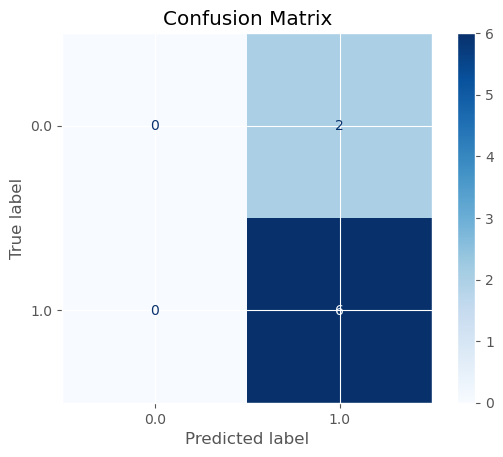

(Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))]),
 0.75,
 array([[0, 2],
        [0, 6]], dtype=int64),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2ac808f7510>)

In [30]:
perform_knn_classification(df=averaged_df.drop(columns='Subject_id'), target='status', id_col=None, k=3)

### Utilizing cleaned, aggregated and z-score normalised data

Accuracy: 0.8750
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



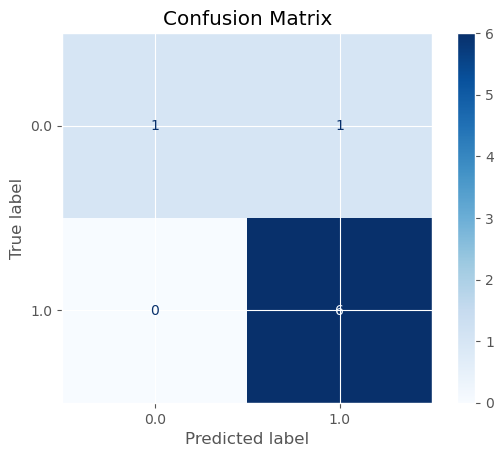

(Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))]),
 0.875,
 array([[1, 1],
        [0, 6]], dtype=int64),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2ac8129ea10>)

In [31]:
perform_knn_classification(df=averaged_df_zscore, target='status', id_col=None, k=3)

### Utilizing cleaned, aggregated and min-max normalised data

Accuracy: 0.8750
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67         2
         1.0       0.86      1.00      0.92         6

    accuracy                           0.88         8
   macro avg       0.93      0.75      0.79         8
weighted avg       0.89      0.88      0.86         8



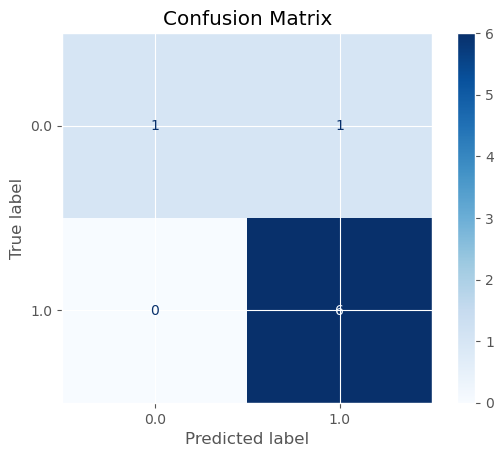

(Pipeline(steps=[('knn', KNeighborsClassifier(n_neighbors=3))]),
 0.875,
 array([[1, 1],
        [0, 6]], dtype=int64),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2ac80da4bd0>)

In [32]:
perform_knn_classification(df=averaged_df_minmax, target='status', id_col=None, k=3)

#### Intepretation
These results show that normalisation of the dataset results in a moderate performance increase in accuracy of the model, whether it be via z-score normalisation or by min-max normalisation. However it must also be noted that this evaluation was on a very limited number of samples overall, because the dataset is so small (only 32 individual patients). A larger sample size would allow for a better evaluation of the method as well as potentially more pronounced differences as a result of the normalisation process.
